# Lab 8 - Signal Detection

In [104]:
import h5py
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import random

hf = h5py.File('data_lowLumi_pt_1000_1200.h5', 'r')
data = hf.get('data')
low_items = np.array(data.get('block0_items'))
low_values = np.array(data.get('block0_values'))  # 442, 14
hf.close()

hf = h5py.File('data_highLumi_pt_1000_1200.h5', 'r')
data = hf.get('data')
high_items = np.array(data.get('block0_items'))
high_values = np.array(data.get('block0_values'))  # 4066, 14
hf.close()

print(low_items)
print(low_values.shape)
print(high_values.shape)

bkgd = pickle.load(open("qcd_100000_pt_1000_1200.pkl",'rb'))
signal = pickle.load(open("higgs_100000_pt_1000_1200.pkl",'rb'))
N_low = 442
N_high = 4066

[b'pt' b'eta' b'phi' b'mass' b'ee2' b'ee3' b'd2' b'angularity' b't1' b't2'
 b't3' b't21' b't32' b'KtDeltaR']
(442, 14)
(4066, 14)


## Part 1 - High luminosity data

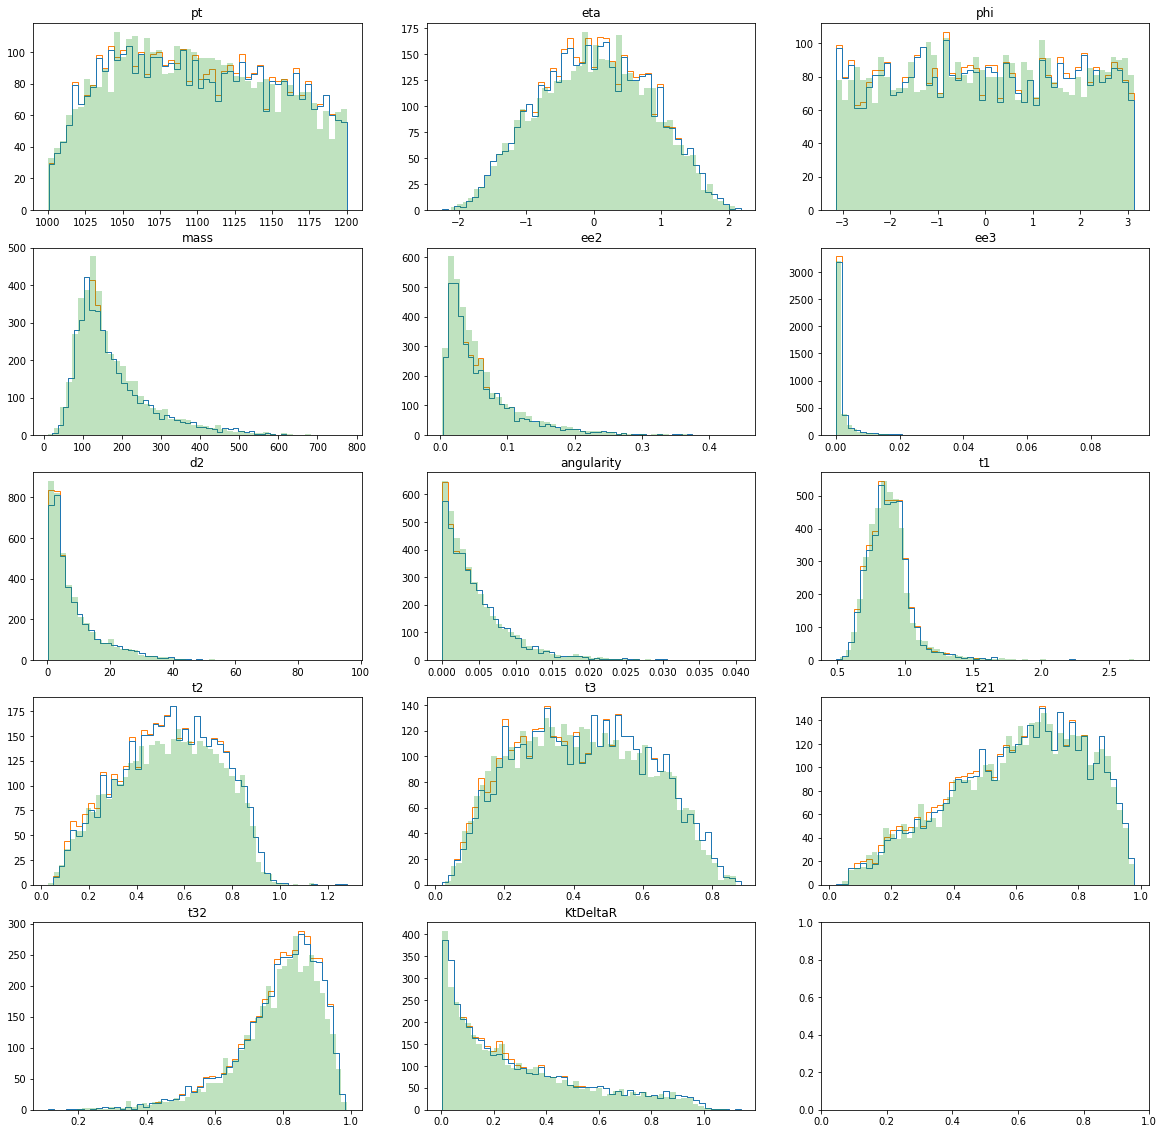

In [39]:
## Without event selection

fig, ax = plt.subplots(5,3,figsize=(20,20))
features = ['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR']

findex = 0
for row in range(5):
    for col in range(3):
        if row==4 and col==2: break
        true_val = high_values[:,findex]
        temp_bkgd = bkgd[features[findex]]
        temp_sig = signal[features[findex]]

        exp_mass_bkgd = np.random.choice(temp_bkgd, round(N_high*(2000/2050))) 
        exp_mass_sig = np.random.choice(temp_sig, round(N_high*(50/2050)))
        
        ax[row, col].hist([exp_mass_bkgd, exp_mass_sig], 50, stacked=True, histtype='step')
        ax[row, col].hist(true_val, 50, alpha=0.3)
        ax[row, col].set_title(features[findex])
        findex += 1
plt.show()


Expected significance:  3.135797303372643

 pt
Obs:  inf 
Exp:  2.970143659306863

 eta
Obs:  inf 
Exp:  2.975864802991242

 phi
Obs:  inf 
Exp:  2.7133011702073913

 mass
Obs:  inf 
Exp:  3.135797303372643

 ee2
Obs:  inf 
Exp:  5.453990225591132

 ee3
Obs:  inf 
Exp:  1.3791515456246535

 d2
Obs:  inf 
Exp:  7.27745662028784

 angularity
Obs:  inf 
Exp:  4.487835462394618

 t1
Obs:  inf 
Exp:  inf

 t2
Obs:  inf 
Exp:  5.772109197787486

 t3
Obs:  inf 
Exp:  6.968907698526276

 t21
Obs:  inf 
Exp:  7.407414076138096

 t32
Obs:  inf 
Exp:  4.108269634241124

 KtDeltaR
Obs:  inf 
Exp:  5.169097885312525


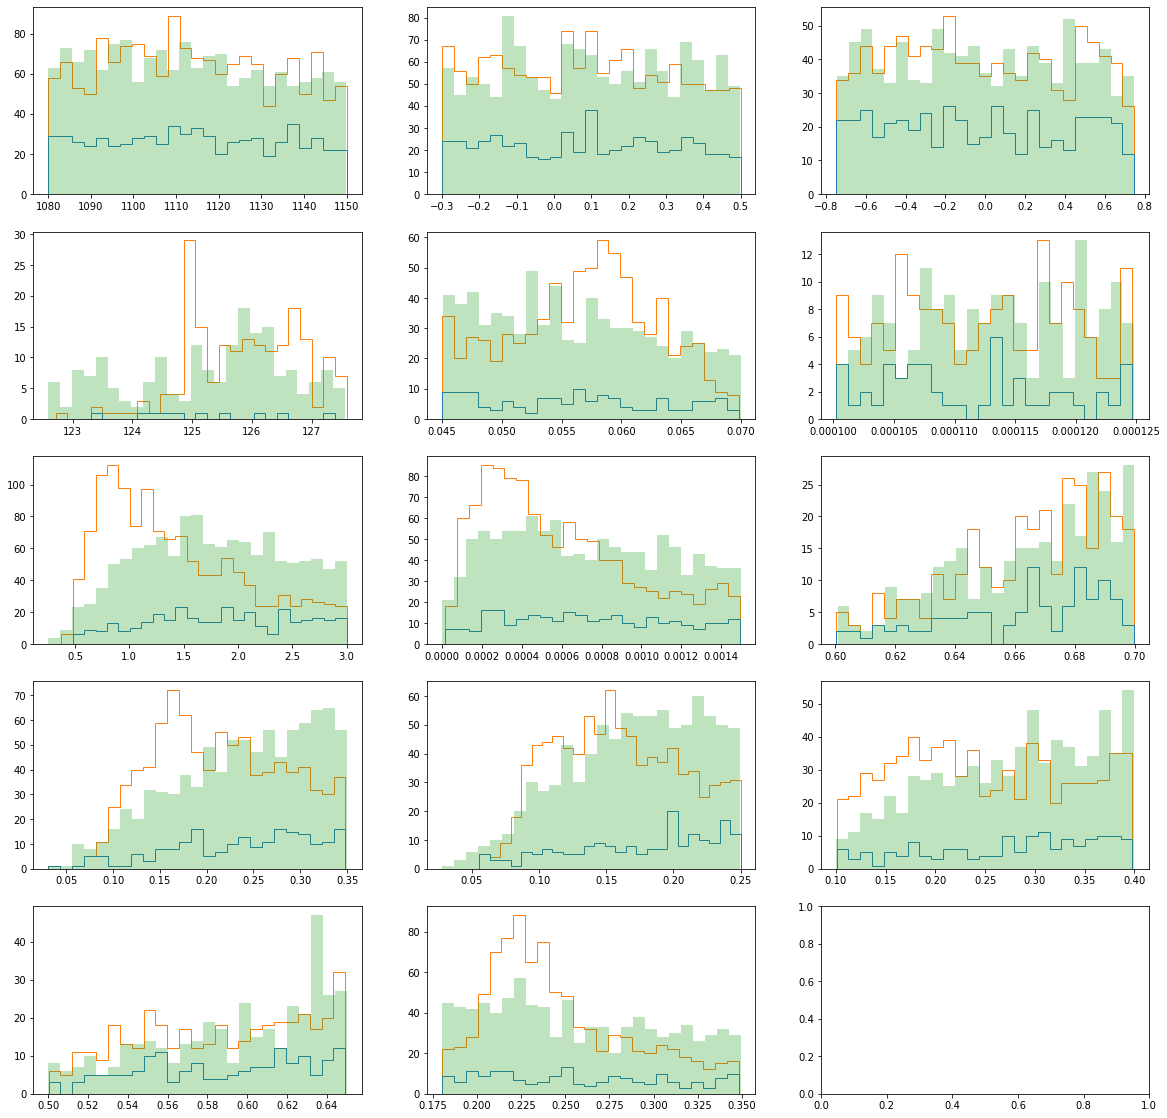

In [58]:
## Event selection

fig, ax = plt.subplots(5,3,figsize=(20,20))

ranges = [[1080,1150], [-0.3,0.5], [-0.75,0.75], [122.59,127.59], [0.045,0.07], [0.0001,0.000125], [0,3], [0,0.0015], [0.6,0.7], [0,0.35], [0,0.25], [0.1,0.4], [0.5,0.65], [0.18,0.35]]
expect_sig = [2.970143659306863, 2.975864802991242, 2.7133011702073913, 3.135797303372643, 5.453990225591132, 1.3791515456246535, 7.27745662028784, 4.487835462394618, 'inf', 5.772109197787486, 6.968907698526276, 7.407414076138096, 4.108269634241124, 5.169097885312525]

print('\nExpected significance:  3.135797303372643')
findex = 0
for row in range(5):
    for col in range(3):
        if row==4 and col==2: break
        temp_true = high_values[:,findex]
        temp_bkgd = bkgd[features[findex]]
        temp_sig = signal[features[findex]]
        lower, upper = ranges[findex]

        true_cut = [n for n in temp_true if n > lower and n < upper]
        temp1 = [n for n in temp_bkgd if n > lower and n < upper]
        temp2 = [n for n in temp_sig if n > lower and n < upper]
        total = len(temp1) + len(temp2)
        bkgd_cut = np.random.choice(temp1, round(len(true_cut) * (len(temp1)/total)))
        sig_cut = np.random.choice(temp2, round(len(true_cut) * (len(temp2)/total)))

        ax[row,col].hist([bkgd_cut, sig_cut], bins=25, stacked=True, histtype='step')
        ax[row,col].hist(true_cut, 25, alpha=0.3)

        k = len(true_cut)
        mu = len(bkgd_cut)
        sig = stats.norm.ppf(stats.poisson.cdf(k, mu))
        print('\n', features[findex])
        print("Obs: ", sig, "\nExp: ", expect_sig[findex])
        findex += 1
plt.show()

## Part 2 - Low luminosity data

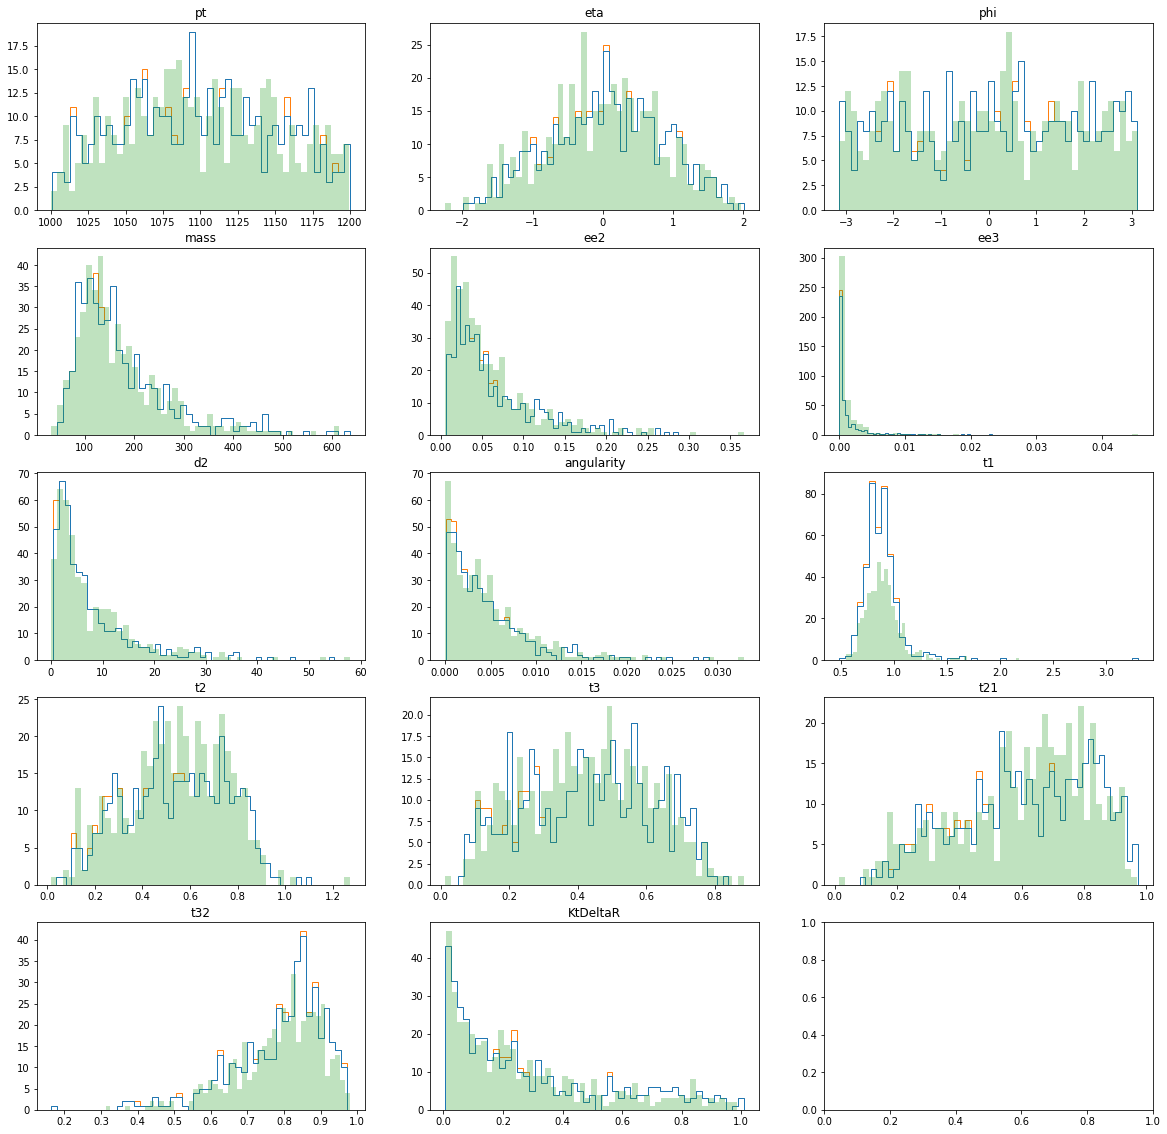

In [59]:
## Without event selection

fig, ax = plt.subplots(5,3,figsize=(20,20))
findex = 0
for row in range(5):
    for col in range(3):
        if row==4 and col==2: break
        true_val = low_values[:,findex]
        temp_bkgd = bkgd[features[findex]]
        temp_sig = signal[features[findex]]

        exp_mass_bkgd = np.random.choice(temp_bkgd, round(N_low*(2000/2050))) 
        exp_mass_sig = np.random.choice(temp_sig, round(N_low*(50/2050)))
        
        ax[row, col].hist([exp_mass_bkgd, exp_mass_sig], 50, stacked=True, histtype='step')
        ax[row, col].hist(true_val, 50, alpha=0.3)
        ax[row, col].set_title(features[findex])
        findex += 1
plt.show()


Expected significance:  3.135797303372643

 pt
Obs:  inf 
Exp:  2.970143659306863

 eta
Obs:  inf 
Exp:  2.975864802991242

 phi
Obs:  7.034858954634869 
Exp:  2.7133011702073913

 mass
Obs:  inf 
Exp:  3.135797303372643

 ee2
Obs:  inf 
Exp:  5.453990225591132

 ee3
Obs:  4.108997212148816 
Exp:  1.3791515456246535

 d2
Obs:  inf 
Exp:  7.27745662028784

 angularity
Obs:  inf 
Exp:  4.487835462394618

 t1
Obs:  5.556357371162622 
Exp:  inf

 t2
Obs:  inf 
Exp:  5.772109197787486

 t3
Obs:  inf 
Exp:  6.968907698526276

 t21
Obs:  inf 
Exp:  7.407414076138096

 t32
Obs:  5.454110811383384 
Exp:  4.108269634241124

 KtDeltaR
Obs:  inf 
Exp:  5.169097885312525


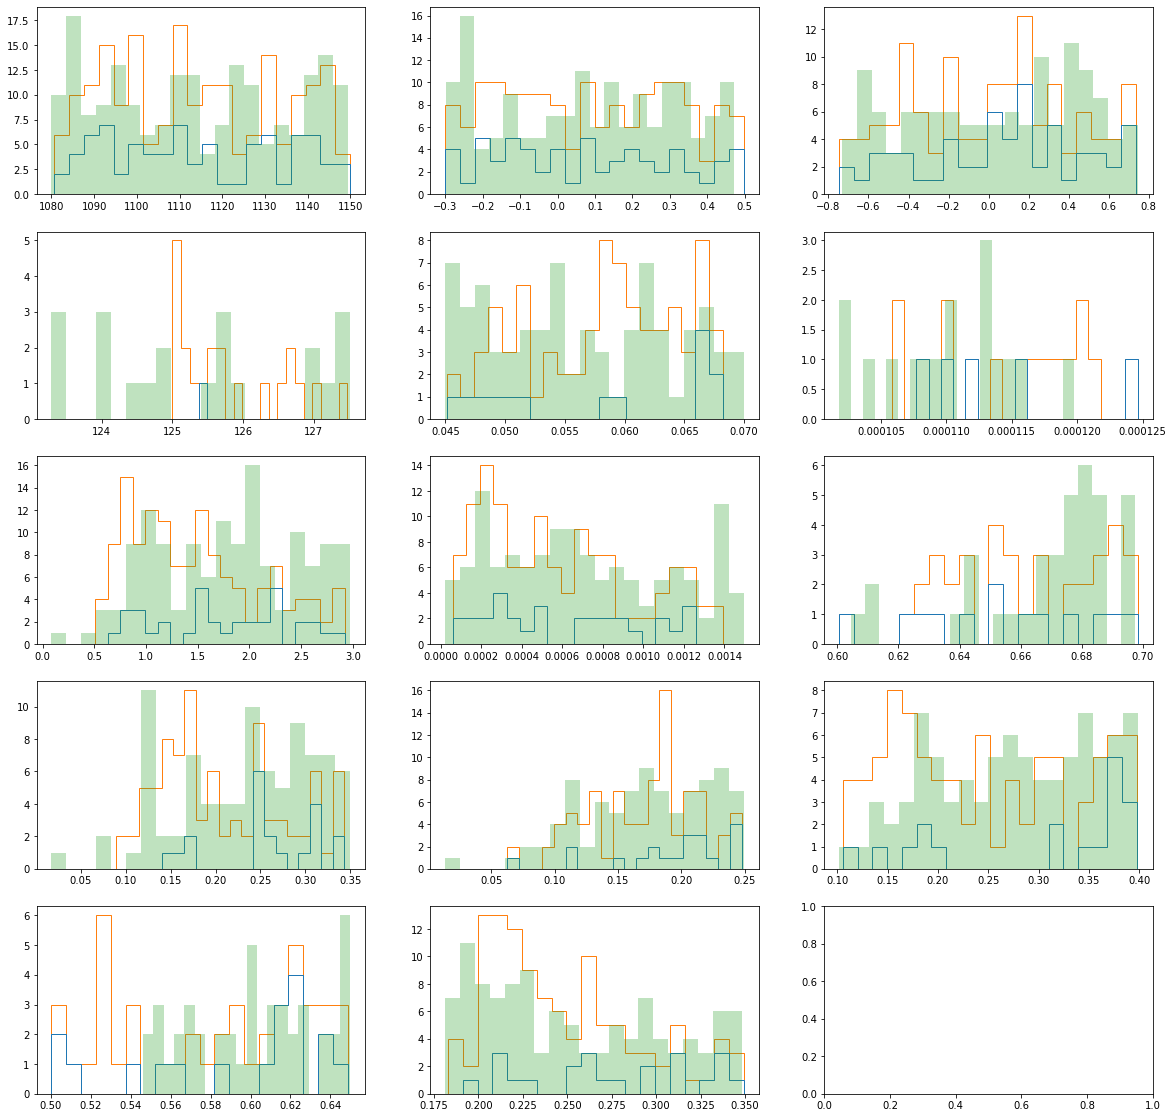

In [62]:
## Event selection

fig, ax = plt.subplots(5,3,figsize=(20,20))

ranges = [[1080,1150], [-0.3,0.5], [-0.75,0.75], [122.59,127.59], [0.045,0.07], [0.0001,0.000125], [0,3], [0,0.0015], [0.6,0.7], [0,0.35], [0,0.25], [0.1,0.4], [0.5,0.65], [0.18,0.35]]
expect_sig = [2.970143659306863, 2.975864802991242, 2.7133011702073913, 3.135797303372643, 5.453990225591132, 1.3791515456246535, 7.27745662028784, 4.487835462394618, 'inf', 5.772109197787486, 6.968907698526276, 7.407414076138096, 4.108269634241124, 5.169097885312525]

print('\nExpected significance:  3.135797303372643')
findex = 0
for row in range(5):
    for col in range(3):
        if row==4 and col==2: break
        temp_true = low_values[:,findex]
        temp_bkgd = bkgd[features[findex]]
        temp_sig = signal[features[findex]]
        lower, upper = ranges[findex]

        true_cut = [n for n in temp_true if n > lower and n < upper]
        temp1 = [n for n in temp_bkgd if n > lower and n < upper]
        temp2 = [n for n in temp_sig if n > lower and n < upper]
        total = len(temp1) + len(temp2)
        bkgd_cut = np.random.choice(temp1, round(len(true_cut) * (len(temp1)/total)))
        sig_cut = np.random.choice(temp2, round(len(true_cut) * (len(temp2)/total)))

        ax[row,col].hist([bkgd_cut, sig_cut], bins=20, stacked=True, histtype='step')
        ax[row,col].hist(true_cut, 20, alpha=0.3)

        k = len(true_cut)
        mu = len(bkgd_cut)
        sig = stats.norm.ppf(stats.poisson.cdf(k, mu))
        print('\n', features[findex])
        print("Obs: ", sig, "\nExp: ", expect_sig[findex])
        findex += 1
plt.show()

## 95% Confidence Level of signal yields

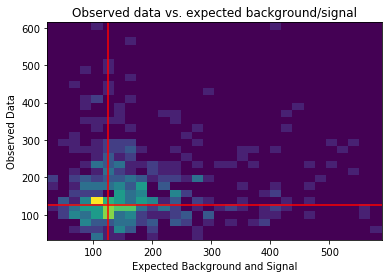

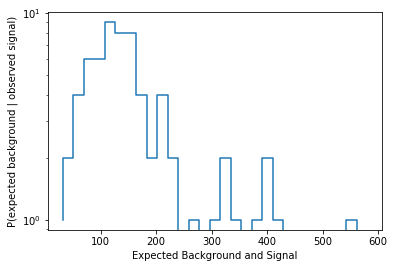

1.9653455910438584
(168.3123999500737, 187.19482361868228)


In [144]:
# Expected confidence (given observed value of 125.09)

temp_bkgd = bkgd['mass']
temp_sig = signal['mass']
exp_mass_bkgd = np.random.choice(temp_bkgd, round(N_low*(2000/2050))) 
exp_mass_sig = np.random.choice(temp_sig, round(N_low*(50/2050)))

expect = np.append(exp_mass_bkgd, exp_mass_sig)
observe = low_values[:,3]  # mass
H, xedges, yedges, temp = plt.hist2d(expect, observe, 30)
plt.axhline(125.09, color='red')
plt.axvline(125.09, color='red')
plt.title('Observed data vs. expected background/signal')
plt.xlabel('Expected Background and Signal')
plt.ylabel('Observed Data')
plt.show()

xcenters = (xedges[:-1] + xedges[1:]) / 2
ycenters = (yedges[:-1] + yedges[1:]) / 2

n1 = 0
for i in range(len(yedges)):
    if 125.09 - yedges[i] > 0:
        n1 = i
horiz_slice = H.T[n1]
plt.step(xcenters, horiz_slice)
plt.xlabel('Expected Background and Signal')
plt.ylabel('P(expected background | observed signal)')
plt.yscale('log')
plt.show()

sig = stats.norm.interval(0.95, np.mean(expect), np.std(expect)/np.sqrt(len(expect)))
print(sig)

# upper limit: observed c events, what mu gives
# integral(inf)(x)pdf(mu)dN = 0.95 --> low luminosity

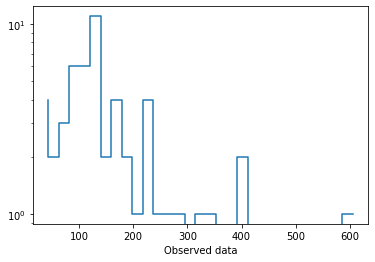

(162.55506858345836, 179.71004035845664)


In [145]:
# Observed confidence (given an expected value)

n1 = 0
for i in range(len(yedges)):
    if 125.09 - yedges[i] > 0:
        n1 = i
vert_slice = H[n1]
plt.step(ycenters, vert_slice)
plt.xlabel('Observed data')
plt.yscale('log')
plt.show()

sig = stats.norm.interval(0.95, np.mean(observe), np.std(observe)/np.sqrt(len(observe)))
print(sig)

Expectation vs. observed levels

Here we see that the upper limit of the 95% confidence interval for expected data is ~187.19 and for observed data is ~179.71. The difference is within significance. Thus, the true mean of observed signals is expected to be within this confidence interval. This also means that the observed data has a lower upper-limit which is closer to the true mean of the mass of the   

## 1$\sigma$ uncertainty of expected 95% confidence level upper limit

In [147]:


mean = np.average(ycenters, weights=vert_slice)
var = np.average((ycenters - mean)**2, weights=vert_slice)
dev = np.sqrt(var)
print('Mean: ', mean, '\nStd Dev: ', dev)
print('Uncertainty: ', mean, '+-', dev)

Mean:  168.7924810246174 
Std Dev:  105.15812545374634
Uncertainty:  168.7924810246174 +- 105.15812545374634


We obtain a large 1-sigma uncertainty for our observed data strength. The uncertainty of expected confidence level is ... 

Lab 8. Pseudo-experiment data analysis Using your optimized event selection, hunt for your signal by using one of the pseduo-experiment dataset. For each task below, you will choose one of the observed data from your specific pT sample to perform the analysis.

High luminosity data
Low luminosity data
- Focus on each feature of your event selection.
- Plot observed data, overlap with expected signal and background (normalized to observed yields) without event selection.
- Plot observed data, overlap with expected signal and background (normalized to observed yields) with optimal event selection.
- Evaluate observed significance and compare your results to expectation

95% Confidence Level of signal yields
- In the low luminosity data, the observed significance is less than 5 σ . We will calculate the 95% confidence level upper limit of signal yield.
- Evaluate the expected 95% confidence level upper limit
- Evaluate the observed 95% confidence level upper limit
- Compare expectation to observation. Comment on your finding.

Bonus:
- Evalute the 1 σ  uncertainty of the expected 95% confidence level upper limit.